In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
#1. 0 ~ 10 범위에서 50 개 데이터를 생성해 보자. 

x = np.linspace(0, 10, num = 50)
y = 2* x + 3 

print(x)
print(y)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[ 3.          3.40816327  3.81632653  4.2244898   4.63265306  5.04081633
  5.44897959  5.85714286  6.26530612  6.67346939  7.08163265  7.48979592
  7.89795918  8.30612245  8.71428571  9.12244898  9.53061224  9.93877551
 10.34693878 10.75510204 11.16326531 11.57142857 11.97959184 12.3877551
 12.79591837 13.20408163 13.6122449  14.02040816 14.42857143 14.83673469
 15.24489796 15.65306122 1

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import os
import datetime

x_train , x_test, y_train, y_test = train_test_split(x,y, shuffle = False)

model  = Sequential([Dense(1, input_shape=(1,) , activation ='linear')     ]) 

# min_delta =  0.0001  : 개선된 값으로 간주되는 최소한의 변화량  

# patience=10 
#0.0001의 개선점이 있는 싯점에서 10번째  0.0001 의 개선점으로 진행된다면 에폭 중단하겠다 . 
es_cb = EarlyStopping(monitor='loss' , min_delta =  0.0001 , patience =10, verbose =1, mode='auto')

csv_logger = CSVLogger('./training.csv')

log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir , histogram_freq=1 )

model.compile(optimizer='sgd',loss ='mse')

model.fit(x_train, y_train, epochs = 500, callbacks = [es_cb,csv_logger,tensorboard_callback], validation_data = (x_test,y_test) )

print(model.get_weights())



Epoch 1/500

2/2 [==============================] - 1s 253ms/step - loss: 288.1780 - val_loss: 93.6895
Epoch 2/500
2/2 [==============================] - 0s 59ms/step - loss: 31.3234 - val_loss: 11.6794
Epoch 3/500
2/2 [==============================] - 0s 64ms/step - loss: 7.2633 - val_loss: 0.3679
Epoch 4/500
2/2 [==============================] - 0s 51ms/step - loss: 2.3094 - val_loss: 0.7865
Epoch 5/500
2/2 [==============================] - 0s 50ms/step - loss: 1.2935 - val_loss: 1.9399
Epoch 6/500
2/2 [==============================] - 0s 49ms/step - loss: 1.1426 - val_loss: 2.2090
Epoch 7/500
2/2 [==============================] - 0s 55ms/step - loss: 1.1102 - val_loss: 2.6782
Epoch 8/500
2/2 [==============================] - 0s 52ms/step - loss: 1.0843 - val_loss: 3.7265
Epoch 9/500
2/2 [==============================] - 0s 51ms/step - loss: 1.0911 - val_loss: 4.2513
Epoch 10/500
2/2 [==============================] - 0s 52ms/step - loss: 1.0726 - val_loss: 1.4686
Epoch 11/5

2/2 [==============================] - 0s 52ms/step - loss: 0.2659 - val_loss: 0.5933
Epoch 78/500
2/2 [==============================] - 0s 47ms/step - loss: 0.2614 - val_loss: 0.9406
Epoch 79/500
2/2 [==============================] - 0s 184ms/step - loss: 0.2617 - val_loss: 0.7289
Epoch 80/500
2/2 [==============================] - 0s 49ms/step - loss: 0.2501 - val_loss: 0.6689
Epoch 81/500
2/2 [==============================] - 0s 49ms/step - loss: 0.2469 - val_loss: 0.8450
Epoch 82/500
2/2 [==============================] - 0s 53ms/step - loss: 0.2440 - val_loss: 0.5231
Epoch 83/500
2/2 [==============================] - 0s 49ms/step - loss: 0.2357 - val_loss: 0.4677
Epoch 84/500
2/2 [==============================] - 0s 49ms/step - loss: 0.2299 - val_loss: 0.5593
Epoch 85/500
2/2 [==============================] - 0s 54ms/step - loss: 0.2241 - val_loss: 0.5313
Epoch 86/500
2/2 [==============================] - 0s 53ms/step - loss: 0.2186 - val_loss: 0.3960
Epoch 87/500
2/2 [====

2/2 [==============================] - 0s 46ms/step - loss: 0.0475 - val_loss: 0.0951
Epoch 160/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0465 - val_loss: 0.1206
Epoch 161/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0455 - val_loss: 0.1295
Epoch 162/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0446 - val_loss: 0.1113
Epoch 163/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0434 - val_loss: 0.0603
Epoch 164/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0440 - val_loss: 0.0547
Epoch 165/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0431 - val_loss: 0.0953
Epoch 166/500
2/2 [==============================] - 0s 55ms/step - loss: 0.0406 - val_loss: 0.1155
Epoch 167/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0399 - val_loss: 0.0932
Epoch 168/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0388 - val_loss: 0.0826
Epoch 169/500


2/2 [==============================] - 0s 53ms/step - loss: 0.0089 - val_loss: 0.0225
Epoch 242/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0088 - val_loss: 0.0279
Epoch 243/500
2/2 [==============================] - 0s 50ms/step - loss: 0.0086 - val_loss: 0.0238
Epoch 244/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0083 - val_loss: 0.0183
Epoch 245/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0082 - val_loss: 0.0250
Epoch 246/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0081 - val_loss: 0.0168
Epoch 247/500
2/2 [==============================] - 0s 53ms/step - loss: 0.0080 - val_loss: 0.0213
Epoch 248/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0078 - val_loss: 0.0218
Epoch 249/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0076 - val_loss: 0.0155
Epoch 250/500
2/2 [==============================] - 0s 56ms/step - loss: 0.0075 - val_loss: 0.0168
Epoch 251/500


2/2 [==============================] - 0s 49ms/step - loss: 0.0017 - val_loss: 0.0061
Epoch 324/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0017 - val_loss: 0.0049
Epoch 325/500
2/2 [==============================] - 0s 51ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 326/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 327/500
2/2 [==============================] - 0s 57ms/step - loss: 0.0016 - val_loss: 0.0046
Epoch 328/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 329/500
2/2 [==============================] - 0s 49ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 330/500
2/2 [==============================] - 0s 47ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 331/500
2/2 [==============================] - 0s 53ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 332/500
2/2 [==============================] - 0s 52ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 333/500


2/2 [==============================] - 0s 52ms/step - loss: 3.5576e-04 - val_loss: 5.6636e-04
Epoch 402: early stopping
[array([[2.0068095]], dtype=float32), array([2.9634671], dtype=float32)]


1/1 [==============================] - 0s 29ms/step


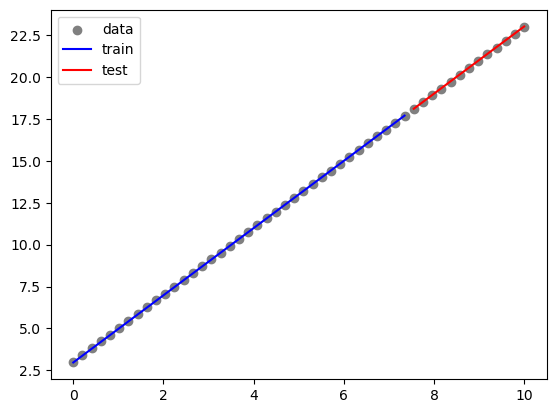

In [4]:
plt.scatter(x,y, label='data',color ='gray')
plt.plot (x_train , model.predict(x_train), label ='train', color ='blue')
plt.plot(x_test, model.predict(x_test), label ='test' ,color ='red')
plt.legend() 

In [16]:
from tensorboard import notebook

notebook.display(port=6006, height=1000)

In [19]:
tensorboard --logdir logs/fit

SyntaxError: invalid syntax (213534274.py, line 1)